# Сборный проект 1. Описание рынка компьютерных игр.

Введение: Мы занимаемся продажей компьютерных игр по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы. Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

## Загрузка и просмотр датасета

In [1]:
#Импорт библиотек

import pandas as pd
import numpy as np
from datetime import datetime
from scipy import stats as st
import matplotlib.pyplot as plt


In [2]:
# читаем датасет

df = pd.read_csv('/datasets/games.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [4]:
df.describe()

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


In [5]:
df.head(5)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [6]:
df['Rating'].unique()


array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

In [7]:
df['Genre'].unique()

array(['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure',
       'Strategy', nan], dtype=object)

In [8]:
df['Platform'].unique()

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       'PS4', '3DS', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne',
       'WiiU', 'GC', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

#### Выводы

Список необходимых действий:
- изменить тип данных в User_Score и Year_of_Release	
- обработать пропуски в колонках: Year_of_Release, Critic_Score, User_Score, Rating, Genre
- изменить регистр заголовков столбцов

## Предобработка данных

In [9]:
# приведем названия столбцов в нижний регистр
df.columns = map(str.lower, df.columns)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


### Преобразовать данные к нужным типам

Обратим внимание на то, что в 'user_score' есть значения с аббревиатурой 'tbd', которые не позволяют изменить тип данных. Проанализируем эти занчения.

In [11]:
#найдем строки с "tbd"
df.query('user_score =="tbd"')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
119,Zumba Fitness,Wii,2010.0,Sports,3.45,2.59,0.0,0.66,NaN,tbd,E
301,Namco Museum: 50th Anniversary,PS2,2005.0,Misc,2.08,1.35,0.0,0.54,61.0,tbd,E10+
520,Zumba Fitness 2,Wii,2011.0,Sports,1.51,1.03,0.0,0.27,NaN,tbd,T
645,uDraw Studio,Wii,2010.0,Misc,1.65,0.57,0.0,0.20,71.0,tbd,E
657,Frogger's Adventures: Temple of the Frog,GBA,NaN,Adventure,2.15,0.18,0.0,0.07,73.0,tbd,E
...,...,...,...,...,...,...,...,...,...,...,...
16695,Planet Monsters,GBA,2001.0,Action,0.01,0.00,0.0,0.00,67.0,tbd,E
16697,Bust-A-Move 3000,GC,2003.0,Puzzle,0.01,0.00,0.0,0.00,53.0,tbd,E
16698,Mega Brain Boost,DS,2008.0,Puzzle,0.01,0.00,0.0,0.00,48.0,tbd,E
16704,Plushees,DS,2008.0,Simulation,0.01,0.00,0.0,0.00,NaN,tbd,E


Из более чем 16 тыс строк, почти 2.5 тысячи имеют такую абревиатуру. Данная абревиатура используется для дальнейшего уточнения данных. Логично присвоить значение NaN, так как явных закономерностей нет, а заменить данные нулем мы не можем, так как может произойти искажение данных, которое повлияет на дальнейшее исследование.

In [12]:
#Заменим "tbd" на Nan
df.loc[df['user_score']=="tbd", 'user_score']=np.nan
#Заменим тип данных рейтинга пользователей на числовой с плавающей точкой
df['user_score'] = df['user_score'].astype('float64')

#Заменим тип данных года выпуска на целочисленный
df['year_of_release'] = df['year_of_release'].astype('Int64')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  Int64  
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   float64
 10  rating           9949 non-null   object 
dtypes: Int64(1), float64(6), object(4)
memory usage: 1.4+ MB


### Обработка пропусков

In [13]:
# Посчитаем количество пропусков в данных
df.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         9125
rating             6766
dtype: int64

Посмотрим на пропуски подробнее

In [14]:
#Пропуски в названиях игр
df.query('name.isnull()')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


В этих двух строках почти нет данных, вероятно в далеком 1993 году просто такие данные не собирали, либо они затерялись. Такие данные можно спокойно удалить. Они не повлияют на ход исследованния.

In [15]:
#Пропуски в жанре игр
df.query('genre.isnull()')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


Мы получили абсолютно те же данные что и в жанрах игр. Удалим данные.


In [16]:
# удаляем пропущенные значения
df.dropna(subset = ['genre'], inplace = True)

In [17]:
#Пропуски в дате выхода игр
df.query('year_of_release.isnull()')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,<NA>,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,<NA>,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,LEGO Batman: The Videogame,Wii,<NA>,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,<NA>,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,Space Invaders,2600,<NA>,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16373,PDC World Championship Darts 2008,PSP,<NA>,Sports,0.01,0.00,0.00,0.00,43.0,NaN,E10+
16405,Freaky Flyers,GC,<NA>,Racing,0.01,0.00,0.00,0.00,69.0,6.5,T
16448,Inversion,PC,<NA>,Shooter,0.01,0.00,0.00,0.00,59.0,6.7,M
16458,Hakuouki: Shinsengumi Kitan,PS3,<NA>,Adventure,0.01,0.00,0.00,0.00,NaN,NaN,NaN


К сожалению тут мы не можем ни чем заменить пропуски. Кажется, что можно частично заменить пропуски на год, указанный в названии игры. Но как показывает практика, года в названиях и по факту выпуска могут не соответствовать, так как часть игр выходит заранее (например FIFA).

In [18]:
#Пропуски в колонке "оценка критиков"
df.query('critic_score.isnull()')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,DS,2005,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [19]:
#Пропуски в колонке "оценка пользователей"
df.query('user_score.isnull()')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,DS,2005,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [20]:
#Пропуски в рейтинге от организации ESRB 
df.query('rating.isnull()')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,DS,2005,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


Как мы можем наблюдать, пропуски имеют место быть во всех рейтингах и в достаточно большом количестве. Я не вижу подходящего способа заполнения пропусков, так как одна и та же игра ожет иметь разные рейтинги в разных оценках. Отсавим эти данные в исходном виде.

In [21]:
#Дополнительно проверим дубликаты дубликаты
df.duplicated().sum()

0

### Рассчет суммарных продаж

In [22]:
df['total_sales'] = df['na_sales'] + df['eu_sales'] + df['jp_sales'] + df['other_sales']
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38


### Вывод

В данном разделе были преобразованны изначальные данные а именно:
- перевод названий столбцов в нижний регистр
- преобразование типов данных
- обработка пропусков

Так же был добавлен новый стобец total_sales - "суммарные продажи во всех регионах"

## Исследовательский анализ данных

### Посмотрите, сколько игр выпускалось в разные годы. Важны ли данные за все периоды?

In [23]:
#Создадим таблицу учёта количества игр разных лет выпуска
year_of_release = df.groupby('year_of_release')['name'].count().reset_index()
year_of_release.columns = ['year', 'kol']
year_of_release

,year,kol
0,1980,9
1,1981,46
2,1982,36
3,1983,17
4,1984,14
5,1985,14
6,1986,21
7,1987,16
8,1988,15
9,1989,17


Построим график для более наглядного вида:

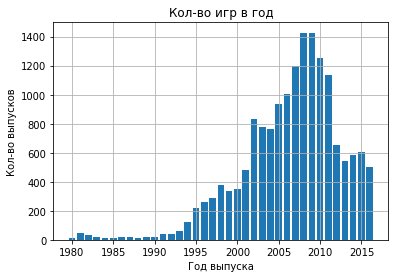

In [24]:
plt.bar(year_of_release['year'], year_of_release['kol'], label='Кол-во выпусков в год')
plt.xlabel('Год выпуска')
plt.ylabel('Кол-во выпусков')
plt.grid()
plt.title(f'Кол-во игр в год')
plt.show();

Мы видим рост появления игр с 1995 года, когда в жизнь масс людей зашли компьютеры. Пик наблюдается в 2007-2008. Данные до 1995 года нет смысла анализировать, за их неактуальностью. Так же мы видим падение цен почти вполовину в 2012 году. Это сязано с мобильной разработкой, игры на телефоне стали в разы популярнее.

### Анализ продаж по платформам.

Задачи: 
- Рассмотреть как менялись продажи по платформам.
- Выбрать платформы с наибольшими суммарными продажами и построить распределение по годам.
- Выявить за какой  срок появляются новые и исчезают старые платформы

In [25]:
df.groupby('platform')['total_sales'].sum().sort_values().reset_index()

,platform,total_sales
0,PCFX,0.03
1,GG,0.04
2,3DO,0.10
3,TG16,0.16
4,WS,1.42
5,NG,1.44
6,SCD,1.86
7,DC,15.95
8,GEN,28.35
9,SAT,33.59


In [26]:
# выберем топ 10 платформ по продажам
platform_df = df.groupby('platform')['total_sales'].sum().sort_values(ascending=False).reset_index().head(10)
platform_df

,platform,total_sales
0,PS2,1255.77
1,X360,971.42
2,PS3,939.65
3,Wii,907.51
4,DS,806.12
5,PS,730.86
6,GBA,317.85
7,PS4,314.14
8,PSP,294.05
9,PC,259.52


Самыми продаваемыми платформами всех времен ожидаемо становятся PS2, XBOX360, PS3

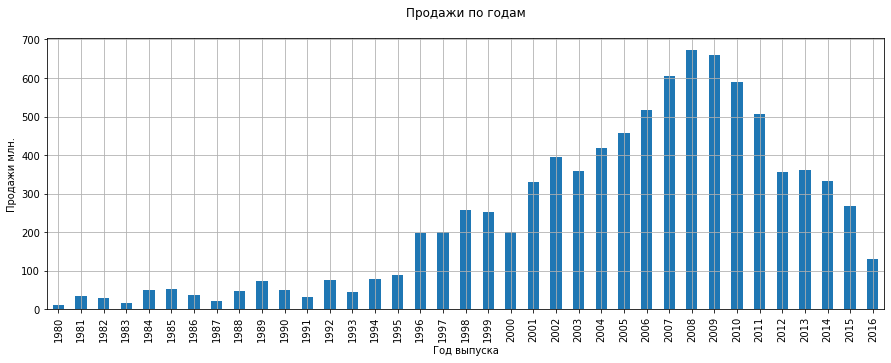

In [27]:
df.groupby('year_of_release')['total_sales'].sum().plot(x='year_of_release', y='total_sales', kind='bar', figsize=(15,5))
plt.title('Продажи по годам\n')
plt.xlabel('Год выпуска')
plt.ylabel('Продажи млн.')
plt.grid(True)
plt.show();

Пик продаваемости попадает на 2008 - 2009

In [28]:
top_platforms = platform_df['platform'].to_list()
top_platforms

['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS', 'GBA', 'PS4', 'PSP', 'PC']

In [29]:
#Создадим новый датасет, отфильтровав старый по названиям платформ, хранящимся в переменной
df_new_top = df.query('platform in @top_platforms')
df_new_top.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E,29.80
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E,28.91


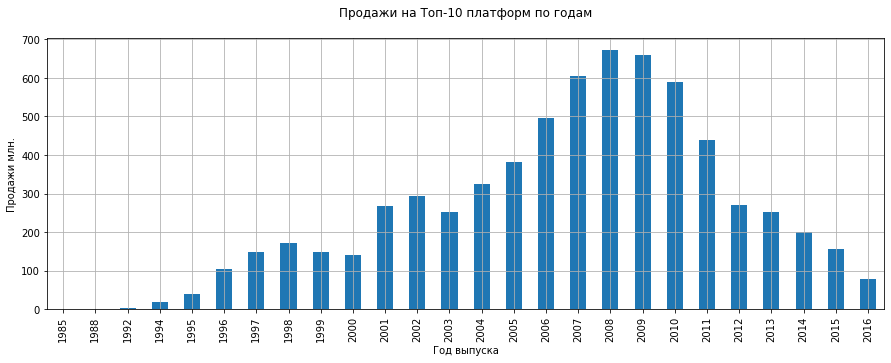

In [30]:
df_new_top.groupby('year_of_release')['total_sales'].sum().plot(x='year_of_release', y='total_sales', kind='bar', figsize=(15,5))
plt.title('Продажи на Топ-10 платформ по годам\n  ')
plt.xlabel('Год выпуска')
plt.ylabel('Продажи млн.')
plt.grid(True)
plt.show();

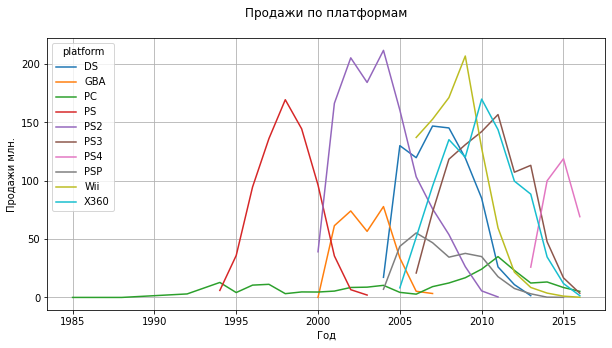

In [31]:
# Распределение по годам для каждой из Топ10 платформ
pd.pivot_table(df_new_top , index='year_of_release', columns='platform', values='total_sales', aggfunc='sum').plot(figsize=(10,5))
plt.grid(True)
plt.title('Продажи по платформам\n  ')
plt.xlabel('Год')
plt.ylabel('Продажи млн.')
plt.show()

In [32]:
# продолжительность актуальности платформы
df_new_top_years = df_new_top.groupby(['platform', 'year_of_release']).agg({'total_sales':'sum'}).reset_index()
df_new_top_years['platform'].value_counts()

PC      26
PS2     12
X360    12
PSP     12
DS      11
PS3     11
Wii     11
PS      10
GBA      8
PS4      4
Name: platform, dtype: int64

Продолжительность актуальности покупок платформы в среднем составляет 11.5 лет.

### Определение актуального периода данных для анализа

Определим период данных, который поможет построить прогноз на 2017 год, учитывая результаты изучения данный на Шаге 2.
По результатам можно сказать, что:
- период должен быть длинной не более 11 лет
- (2011 - 2016) актуальный период, который поможет построить прогноз на 2017 год. Этот период со стабильнымы продажами игр и содержит информацию по 4 из 6 платформам с наибольшими суммарными продажами.

Но учитывая высокую динамичность рынка, можно сделать вывод, что для дальнейшего анализа нам потребуются данные по платформам, возникшим не ранее 3 лет назад по отношению к 2017 году, на который нам нужно сделать прогноз и запланировать рекламные кампании. 
Поэтому примем за исследуемый период (2014-2016)

In [33]:
#кол-во игр для каждой платформы по годам в актуальный период
df.query('year_of_release > 2010').pivot_table(index='platform', columns='year_of_release', values='name', aggfunc='count', fill_value='.')

year_of_release,2011,2012,2013,2014,2015,2016
platform,,,,,,
3DS,116.0,93.0,91.0,80.0,86.0,46.0
DS,153.0,23.0,8.0,.,.,.
PC,139.0,61.0,38.0,47.0,50.0,54.0
PS2,7.0,.,.,.,.,.
PS3,215.0,148.0,126.0,108.0,73.0,38.0
PS4,.,.,16.0,75.0,137.0,164.0
PSP,139.0,106.0,54.0,10.0,3.0,.
PSV,18.0,53.0,63.0,100.0,110.0,85.0
Wii,143.0,31.0,12.0,6.0,4.0,1.0


In [34]:
# актуализируем датасет
df_actual_years = df[df['year_of_release'] >= 2014]

### Поиск потенциально прибыльных платформ

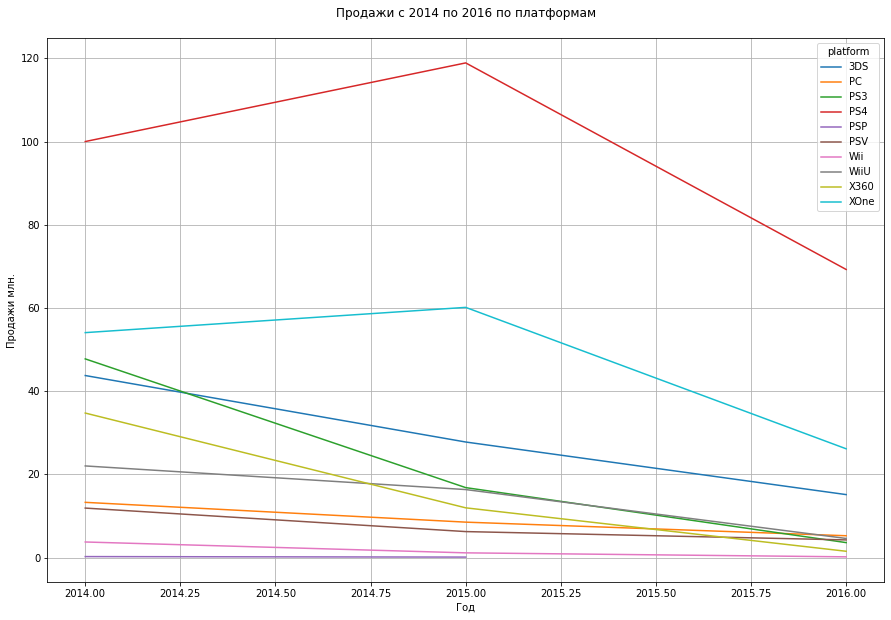

In [35]:
# график продаж за актуальный период
pd.pivot_table(df_actual_years, index='year_of_release', columns='platform', values='total_sales', aggfunc='sum').plot(figsize=(15,10))
plt.grid(True)
plt.title('Продажи с 2014 по 2016 по платформам\n  ')
plt.xlabel('Год')
plt.ylabel('Продажи млн.')
plt.show()

Вывод: Анализируя график,мы видим, что все платформы теряют в продажах.
В задании сказано, что данные 2016 года могут быть неполными, а значит ориентироваться на него не стоит.
Стабильный продажи на протяжении всего периода показывает PC.
Наилучшие перспективы в улучшении показателей у платформ PS4 и XOne.

### Глобальные продажи игр по платформам

Построим график «ящик с усами» по глобальным продажам игр в разбивке по платформам.

(0.0, 1.25)

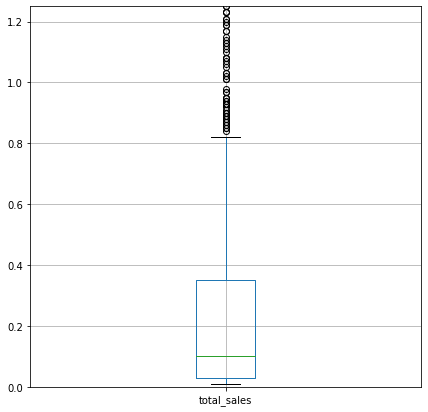

In [36]:
#Глобальные продажи за актуальный период по всем платформам
df_actual_years.boxplot('total_sales', figsize=(7,7))
plt.ylim(0,1.25)

In [37]:
df_actual_years['total_sales'].describe()

count    1689.000000
mean        0.431883
std         1.056109
min         0.010000
25%         0.030000
50%         0.100000
75%         0.350000
max        14.630000
Name: total_sales, dtype: float64

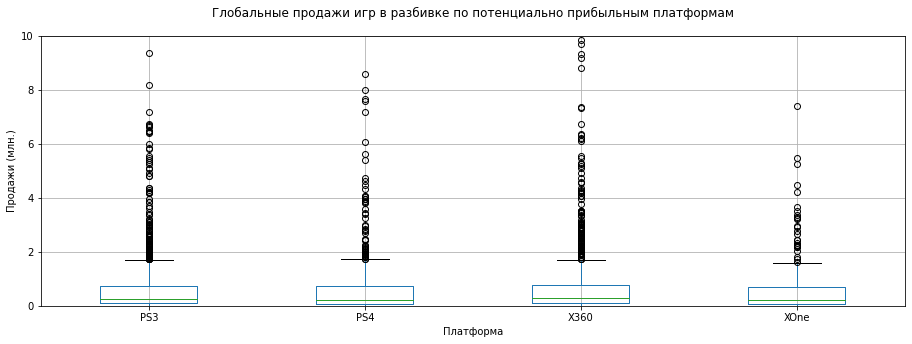

In [38]:
# Рассмотрим потенциально перспективных платформы более подробно
potential_platform = ['X360', 'PS3', 'XOne', 'PS4']

report = df.query('platform in @potential_platform')

report.boxplot('total_sales', by='platform', figsize=(15, 5))
plt.suptitle('Глобальные продажи игр в разбивке по потенциально прибыльным платформам')
plt.title(None);
plt.xlabel('Платформа'), plt.ylabel('Продажи (млн.)')
plt.ylim(0, 10)
plt.show()

Вывод: График "ящик с усами" позволяет наглядно увидеть основные характеристики данных (медиана, нижний и верхний квартили, минимальное и максимальное значение выборки и выбросы).
На построенном графике видно примерно одинаковые значения основных характеристик у старых платформ  PS3 и X360, и новых PS4 и XOne. 
Можно сказать, что сначала преобладала популярность игр на X360, а при выходе в одно время новых версий платформ данных серий стала преобладать популярность PS4.

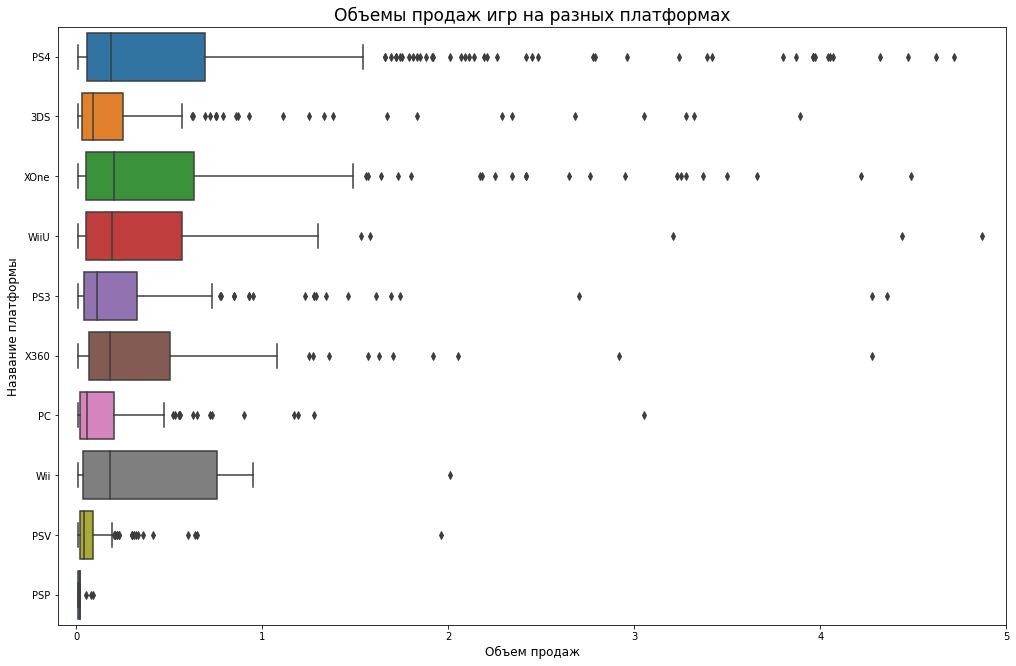

In [39]:
# код ревьюера

import seaborn as sns

plt.figure(figsize=(17, 11))
sns.boxplot(data=df_actual_years, y='platform', x='total_sales')
plt.xlim(-0.1, 5)

plt.title('Объемы продаж игр на разных платформах', size=17)
plt.xlabel('Объем продаж', size=12)
plt.ylabel('Название платформы', size=12)

plt.show()

### Влияние пользователей и критиков

Для подсчета выберем однц из наиболее популярных платформ - PS4.

In [40]:
ps4 = df_actual_years[df_actual_years['platform'] == 'PS4']

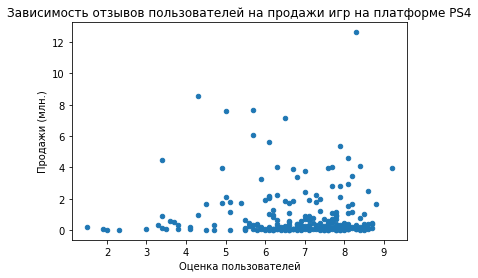

In [41]:
ps4.plot(y='total_sales', x='user_score', kind='scatter');
plt.ylabel('Продажи (млн.)'), plt.xlabel('Оценка пользователей'), plt.title('Зависимость отзывов пользователей на продажи игр на платформе PS4');

In [42]:
print('Коэффициент корреляции =', ps4['total_sales'].corr(ps4['user_score']))

Коэффициент корреляции = -0.040131589472697356


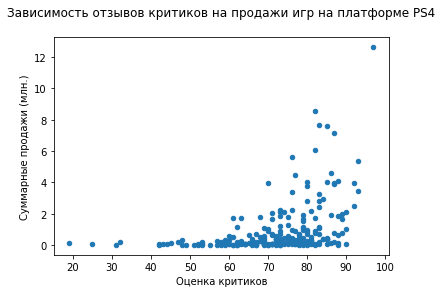

In [43]:
ps4.plot(x='critic_score', y='total_sales', kind='scatter');
plt.ylabel('Суммарные продажи (млн.)'), plt.xlabel('Оценка критиков'), plt.title('Зависимость отзывов критиков на продажи игр на платформе PS4\n');

In [44]:
print('Коэффициент корреляции =', ps4['total_sales'].corr(ps4['critic_score']))

Коэффициент корреляции = 0.40266141068104083


Вывод: Влияние оценки критиков на продажи есть, но совсем незначительное (коэффициент корреляции равен 0.4). В то время как влияние отзывов пользователей на продажи  нет (коэффициент корреляции равен -0.03).

### Соотнесите выводы с продажами игр на других платформах.

In [45]:
df_actual_years.query('platform == "PS3"')[['critic_score', 'user_score', 'total_sales']].corr().round(2)


,critic_score,user_score,total_sales
critic_score,1.00,0.69,0.45
user_score,0.69,1.00,-0.17
total_sales,0.45,-0.17,1.00


In [46]:

df_actual_years.query('platform == "XOne"')[['critic_score', 'user_score', 'total_sales']].corr().round(2)

,critic_score,user_score,total_sales
critic_score,1.00,0.44,0.43
user_score,0.44,1.00,-0.07
total_sales,0.43,-0.07,1.00


In [47]:
df_actual_years.query('platform == "X360"')[['critic_score', 'user_score', 'total_sales']].corr().round(2)

,critic_score,user_score,total_sales
critic_score,1.00,0.63,0.53
user_score,0.63,1.00,-0.14
total_sales,0.53,-0.14,1.00


Вывод: По таблице коэффициентов корреляции можно заметить, что у всех потенциально прибыльных платформах примерно равные значения коэффициентов корреляции зависимости отзывов критиков на продажи = 0.4. И нет зависимости от отзывов покупателей.

### Распределение игр по жанрам

Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?

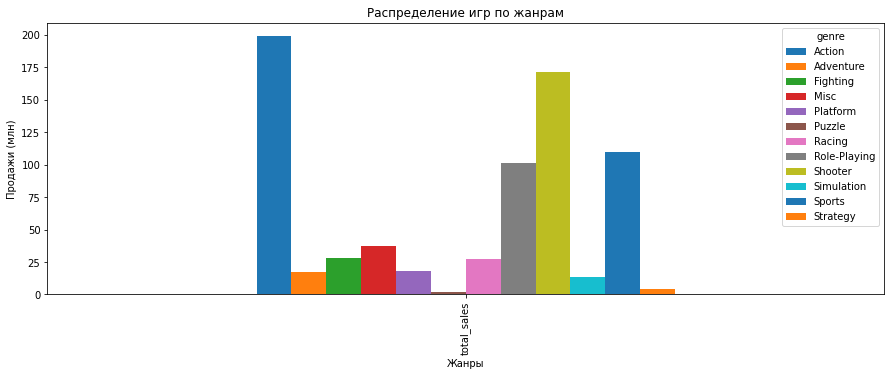

In [48]:
fig, ax = plt.subplots(figsize=(15,5))
my_colors = 'rgbkymc'
pd.pivot_table(df_actual_years, columns='genre', values='total_sales', aggfunc='sum').plot(ax=ax, kind='bar');
plt.ylabel('Продажи (млн)')
plt.xlabel('Жанры')
plt.title('Распределение игр по жанрам');

In [49]:
df_actual_years.groupby('genre').agg({'total_sales':'sum'}).sort_values(by='total_sales', ascending=False).reset_index()

,genre,total_sales
0,Action,199.36
1,Shooter,170.94
2,Sports,109.48
3,Role-Playing,101.44
4,Misc,37.55
5,Fighting,28.22
6,Racing,27.52
7,Platform,18.09
8,Adventure,17.55
9,Simulation,13.13


- Жанрами с самыми высокими продажами являются жанры: Action (199,36 млн) и Shooter (170,94 млн)
- Жанрами с самыми низкими продажами являются жанры: Puzzle (2,21) и Strategy (3,96)

In [50]:
df_genre = df_actual_years.groupby(['genre'])\
                        .agg({'total_sales':'sum', 'name':'count'})\
                        .rename(columns={'name':'name_count'})\

df_genre.sort_values(by = 'total_sales', ascending=False)

,total_sales,name_count
genre,,
Action,199.36,619
Shooter,170.94,128
Sports,109.48,161
Role-Playing,101.44,221
Misc,37.55,113
Fighting,28.22,60
Racing,27.52,69
Platform,18.09,38
Adventure,17.55,185


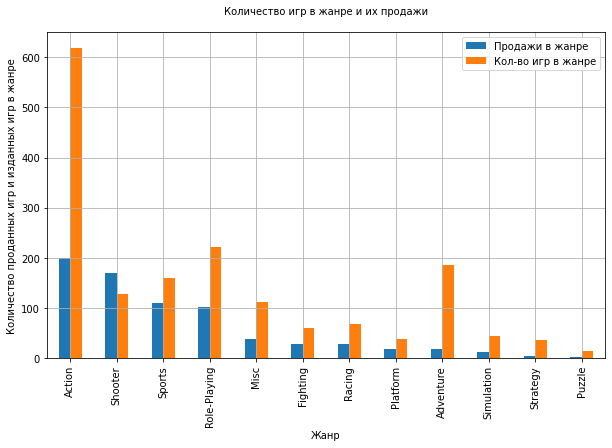

In [51]:
ax=df_genre[['total_sales', 'name_count']].sort_values(by = 'total_sales', ascending=False).plot(kind='bar', figsize=(10, 6))

plt.title('Количество игр в жанре и их продажи\n  ', fontsize=10)
plt.xlabel('Жанр')
plt.ylabel('Количество проданных игр и изданных игр в жанре')
plt.legend(['Продажи в жанре', 'Кол-во игр в жанре'])
plt.grid(True)
plt.show()

Мы можем сказать, что самыми продаваемыми жанрами являются:

- Action
- Shooter
- Role-Playing
- Sports

Но точно нельзя сказать о прибыльности жанра, так как прибыль складывается из выручка - затраты, а затрат на выпуск игр мы не можем. В жанре Action самое большое кол-во игр, возможно их создание обходится недорого, а объемы продаж позволяют производителям получать хорошую прибыль. Также большое кличество игр наблюдается в жанре Role-Playing и сопровождается высоким уровнем продаж.
А вот в жанре Shooter игр не так много, хотя жанр на 2 месте по объемам продаж, возможно создание игр обходится существенно дороже и прибыль становится не такой ощутимой.

Посмотрим жанры самых продаваемых игр в каждом из регионов

In [52]:
df_actual_years.sort_values(by='na_sales', ascending=False).head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,NaN,14.63
99,Call of Duty: Black Ops 3,XOne,2015,Shooter,4.59,2.11,0.01,0.68,NaN,NaN,NaN,7.39
47,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,Role-Playing,4.35,3.49,3.10,0.74,NaN,NaN,NaN,11.68
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
96,Super Smash Bros. for Wii U and 3DS,3DS,2014,Fighting,3.27,1.37,2.43,0.48,NaN,NaN,NaN,7.55


In [53]:
df_actual_years.sort_values(by='eu_sales', ascending=False).head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
77,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,8.58
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,NaN,14.63
94,FIFA 17,PS4,2016,Sports,0.66,5.75,0.08,1.11,85.0,5.0,E,7.60
143,FIFA 15,PS4,2014,Sports,0.80,4.33,0.05,0.90,82.0,5.7,E,6.08


In [54]:
df_actual_years.sort_values(by='jp_sales', ascending=False).head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
412,Yokai Watch 2 Ganso/Honke,3DS,2014,Role-Playing,0.09,0.00,3.18,0.01,NaN,NaN,NaN,3.28
47,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,Role-Playing,4.35,3.49,3.10,0.74,NaN,NaN,NaN,11.68
406,Monster Hunter X,3DS,2015,Action,0.27,0.21,2.79,0.05,NaN,NaN,NaN,3.32
563,Yokai Watch 2 Shinuchi,3DS,2014,Role-Playing,0.00,0.00,2.68,0.00,NaN,NaN,NaN,2.68
312,Monster Hunter 4 Ultimate,3DS,2014,Role-Playing,0.68,0.48,2.62,0.11,86.0,8.7,T,3.89


Вывод:
- в Северной Америке самые продаваемые игры имеют жанры Action (Grand Theft Auto V на платформах XOne и PS) и Shooter (разновидности Call of Duty)
- в Европе похожая ситуация с Северной Америкой, т.е. игры имеют жанры Action (Grand Theft Auto V на платформах PS4) и Shooter (Call of Duty: Black Ops 3), но дополнительно присутствуют игры жанра Sports (FIFA 16 и FIFA 17)
- в Японии совершенно другая ситуация, популярны жанры Simulation (Animal Crossing: New Leaf) и Role-Playing, связано это скорее всего с культурой жителей и их интересами.

## Портрет пользователя каждого региона

Определим для пользователя каждого региона (NA, EU, JP):

- Самые популярные платформы (топ-5)
- Самые популярные жанры (топ-5)
- Влияет ли рейтинг ESRB на продажи в отдельном регионе?

### Определение популярных платформ

Для определения популярных платформ создадим отдельную таблицу, в которую запишем сгруппированные данные платформам и посчитаем суммы продаж по каждой платформе в каждом регионе.

In [55]:
platform_for_region=df_actual_years.groupby('platform').agg({'na_sales':'sum', 'eu_sales':'sum', 'jp_sales':'sum'}).reset_index()
platform_for_region['%_na_sales'] = platform_for_region['na_sales'] / platform_for_region['na_sales'].sum() * 100
platform_for_region['%_eu_sales'] = platform_for_region['eu_sales'] / platform_for_region['eu_sales'].sum() * 100
platform_for_region['%_jp_sales'] = platform_for_region['jp_sales'] / platform_for_region['jp_sales'].sum() * 100
platform_for_region = platform_for_region[['platform', 'na_sales', '%_na_sales', 'eu_sales', '%_eu_sales', 'jp_sales', '%_jp_sales']]
platform_for_region

,platform,na_sales,%_na_sales,eu_sales,%_eu_sales,jp_sales,%_jp_sales
0,3DS,22.64,7.970147,16.12,5.955372,44.24,47.523902
1,PC,7.23,2.545237,17.97,6.638836,0.00,0.000000
2,PS3,22.05,7.762445,25.54,9.435496,11.22,12.052852
3,PS4,98.61,34.714497,130.04,48.041968,15.02,16.134923
4,PSP,0.00,0.000000,0.00,0.000000,0.36,0.386723
5,PSV,2.52,0.887137,3.53,1.304123,14.54,15.619293
6,Wii,2.08,0.732240,2.59,0.956849,0.00,0.000000
7,WiiU,19.36,6.815462,13.15,4.858135,7.31,7.852616
8,X360,28.30,9.962684,15.49,5.722625,0.08,0.085938
9,XOne,81.27,28.610153,46.25,17.086597,0.32,0.343753


Проиллюстрируем полученные результаты с помощью графика.


In [56]:
def graph_func(data, parametr):
    regions = ['na_sales', 'eu_sales', 'jp_sales']
    num_cols = len(regions)
    num_rows = 1
    fig, ax = plt.subplots(num_rows, num_cols, figsize=(18, 5))
    for i, region in enumerate(regions):
        data = data.sort_values(by=region)
        ax[i].barh(data[parametr], data[region])
        ax[i].set(xlabel = region)

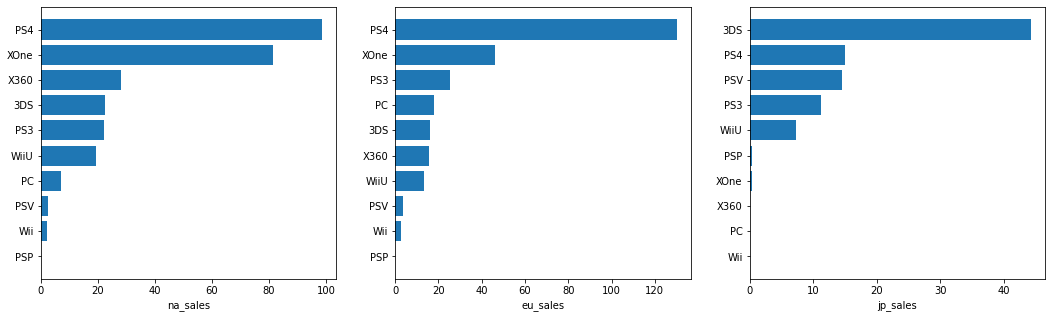

In [57]:
graph_func(platform_for_region, 'platform')

### Определение популярных жанров

Аналогично определим популярные жанры

In [58]:
genre_for_region=df_actual_years.groupby('genre').agg({'na_sales':'sum', 'eu_sales':'sum', 'jp_sales':'sum'}).reset_index()
genre_for_region

,genre,na_sales,eu_sales,jp_sales
0,Action,72.53,74.68,29.58
1,Adventure,5.64,6.49,3.60
2,Fighting,12.43,6.69,6.37
3,Misc,15.05,12.86,5.61
4,Platform,6.79,6.80,2.69
5,Puzzle,0.65,0.52,0.93
6,Racing,8.74,14.13,1.76
7,Role-Playing,33.47,28.17,31.16
8,Shooter,79.02,65.52,4.87
9,Simulation,2.63,7.30,2.31


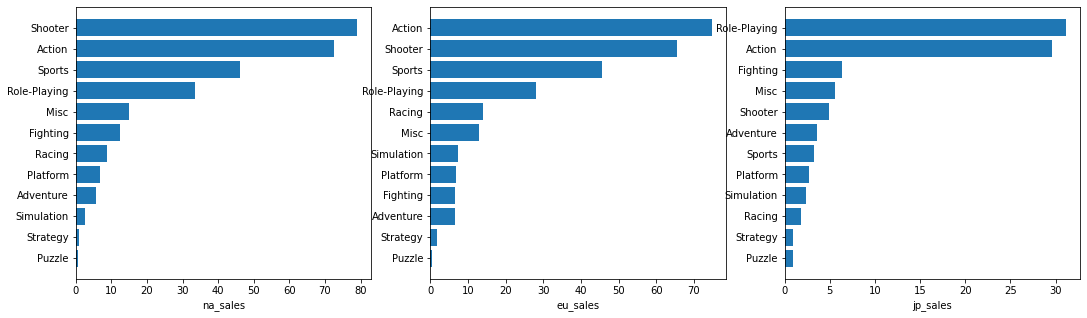

In [59]:
graph_func(genre_for_region, 'genre')

Топ 5 популярных жанов в Северной Америке и Европе примерно похож между собой,разве что первые два места Shooter и Action меняются местами в зависимости от ркгиона, но в Японии ситуация сильно отличается, на первое место выходит жанр Role Play. Скорее всего это связано с культурой населения.

### Зависимость рейтинга ESRB на продажи в отдельном регионе

In [60]:
df_rating = df_actual_years[df_actual_years['rating'].isna() == False]

In [61]:
df_rating['rating'].unique()

array(['M', 'E', 'T', 'E10+'], dtype=object)

In [62]:
rating_for_region=df_actual_years.groupby('rating').agg({'na_sales':'sum', 'eu_sales':'sum', 'jp_sales':'sum'}).reset_index()

In [63]:
rating_for_region['%_na_sales'] = rating_for_region['na_sales'] / rating_for_region['na_sales'].sum() * 100
rating_for_region['%_eu_sales'] = rating_for_region['eu_sales'] / rating_for_region['eu_sales'].sum() * 100
rating_for_region['%_jp_sales'] = rating_for_region['jp_sales'] / rating_for_region['jp_sales'].sum() * 100

In [64]:
rating_for_region = rating_for_region[['rating', 'na_sales', '%_na_sales', 'eu_sales', '%_eu_sales', 'jp_sales', '%_jp_sales']]
rating_for_region['desc'] = ['Для взрослых', 'Для всех', 'Для подростков', '10 лет и старше']

In [65]:
rating_for_region

,rating,na_sales,%_na_sales,eu_sales,%_eu_sales,jp_sales,%_jp_sales,desc
0,E,50.74,23.133035,58.06,27.421716,8.94,24.702957,Для взрослых
1,E10+,33.23,15.149995,26.16,12.355358,4.46,12.323846,Для всех
2,M,96.42,43.959150,93.44,44.131677,8.01,22.133186,Для подростков
3,T,38.95,17.757819,34.07,16.091248,14.78,40.840011,10 лет и старше


Выводы:

Портрет пользователя NA:
- Топ популярных платформ: PS4,XOne,X360,3DS,PS3 
- Топ популярных жанров игр:  Shooter, Action, Sports, Role-Playing, Misc
- Больше всего игр рейтинга M 43.9% от всех акуальных игр

Портрет пользователя EU:
- Топ популярных платформ: PS4,XOne, X360, PC, 3DS
- Топ популярных жанров игр: Action, Shooter, Sports, Role-Playing, Racing
- Больше всего игр рейтинга M  44.1% от всех акуальных игр

Портрет пользователя JP:
- Топ популярных платформ: 3DS, PS, PSV, PS3, WiiU
- Топ популярных жанров игр: Role-Playing, Action, Misc, Fighting, Platform
- Больше всего игр рейтинга T  40.8% от всех акуальных игр


## Проверка гипотез

### Проверка гипотезы: Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

H0: cредние пользовательские рейтинги платформ Xbox One и PC одинаковые.
H1: cредние пользовательские рейтинги платформ Xbox One и PC различаются

In [66]:
#Сформируем данные для проверки гипотезы
xone = df_actual_years.query(' platform == "XOne" ')['user_score'].dropna().to_list()
pc = df_actual_years.query(' platform == "PC" ')['user_score'].dropna().to_list()

#Рассчитаем средние значения
xone_mean = df_actual_years.query(' platform == "XOne" ')['user_score'].mean()
pc_mean = df_actual_years.query(' platform == "PC" ')['user_score'].mean()

print('Средний пользовательский рейтинг Xbox One: {:.3}\n'
     'Средний пользовательский рейтинг PC: {:.2}'.format(xone_mean, pc_mean))

Средний пользовательский рейтинг Xbox One: 6.59
Средний пользовательский рейтинг PC: 6.3


In [67]:
alpha = .01

results = st.ttest_ind(xone,  pc,  equal_var = False)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.11601398086668832
Не получилось отвергнуть нулевую гипотезу


Отвергнуть нулевую гипотезу не получилось, а значит можно сказать, что с большой долей вероятности средние пользовательские рейтинги платформ XOne и PC не имеют статистически значимых отличий.

### Средние пользовательские рейтинги жанров Action и Sports разные

H0: cредние пользовательские рейтинги жанров Action и Sports одинаковые
H1: средние пользовательские рейтинги жанров Action и Sports разные

In [68]:
#Сформируем данные для проверки гипотезы
action = df_actual_years.query('genre == "Action"')['user_score'].dropna().to_list()
sports = df_actual_years.query('genre == "Sports"')['user_score'].dropna().to_list()

#Рассчитаем средние значения
action_mean = df_actual_years.query('genre == "Action"')['user_score'].mean()
sports_mean = df_actual_years.query('genre == "Sports"')['user_score'].mean()

print('Средний пользовательский рейтинг Action: {:.3}\n'
     'Средний пользовательский рейтинг Sports: {:.2}'.format(action_mean, sports_mean))

Средний пользовательский рейтинг Action: 6.76
Средний пользовательский рейтинг Sports: 5.2


In [69]:
alpha = .01

results = st.ttest_ind(
    action, 
    sports, 
    equal_var = False)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 1.1825550382644557e-14
Отвергаем нулевую гипотезу


Альтернативная гипотеза может быть правдой, с большой долей вероятности средние пользовательские рейтинги жанров Action и Sports  имеют статистически значимые отличий.

## Вывод

**Целью исследования** было выявление определяющих успешность игры закономерностей, что позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании на предстоящий год.

**Для этого был обработан массив данных:**
- заменили названия столбцов
- преобразовали типы данных в нужные
- обработали пропуски
- посчитали суммарные продажи во всех регионах в новый столбец

**В ходе исследования мы выяснили:**
- актуальный период для исследования 2011-2016гг
- самые перспективные платформы это PS4, XOne
- обьемы продаж немного зависят от оценок критиков, и не зависят от оценок пользователей
- cамые продаваемые жанры: Action,Shooting именно в этих жанрах подавляющее большинство игр. 

**Анализируя портрет пользователей мы выяснили:**

Портрет пользователя NA:
- Топ популярных платформ: PS4,XOne,X360,3DS,PS3 
- Топ популярных жанров игр:  Shooter, Action, Sports, Role-Playing, Misc
- Больше всего игр рейтинга M 43.9% от всех акуальных игр

Портрет пользователя EU:
- Топ популярных платформ: PS4,XOne, X360, PC, 3DS
- Топ популярных жанров игр: Action, Shooter, Sports, Role-Playing, Racing
- Больше всего игр рейтинга M  44.1% от всех акуальных игр

Портрет пользователя JP:
- Топ популярных платформ: 3DS, PS, PSV, PS3, WiiU
- Топ популярных жанров игр: Role-Playing, Action, Misc, Fighting, Platform
- Больше всего игр рейтинга T  40.8% от всех акуальных игр


**В результате проверки гипотез мы выявили:**
- Cредние пользовательские рейтинги платформ Xbox One и PC не различаются
- Cредние пользовательские рейтинги жанров Action и Sports различаются


**Исходя из полученных результатов можно сделать соответствующие рекомендации:**

- игры для приставок/консолей принесут больше прибыли
- всегда важно ориентировать на показатели страны в которой продаешь товар
- популярным продуктом будет являться игра на PS4/XOne в жанре Action/Shooting
